# Report 05 Table of Initial Experimental Arms

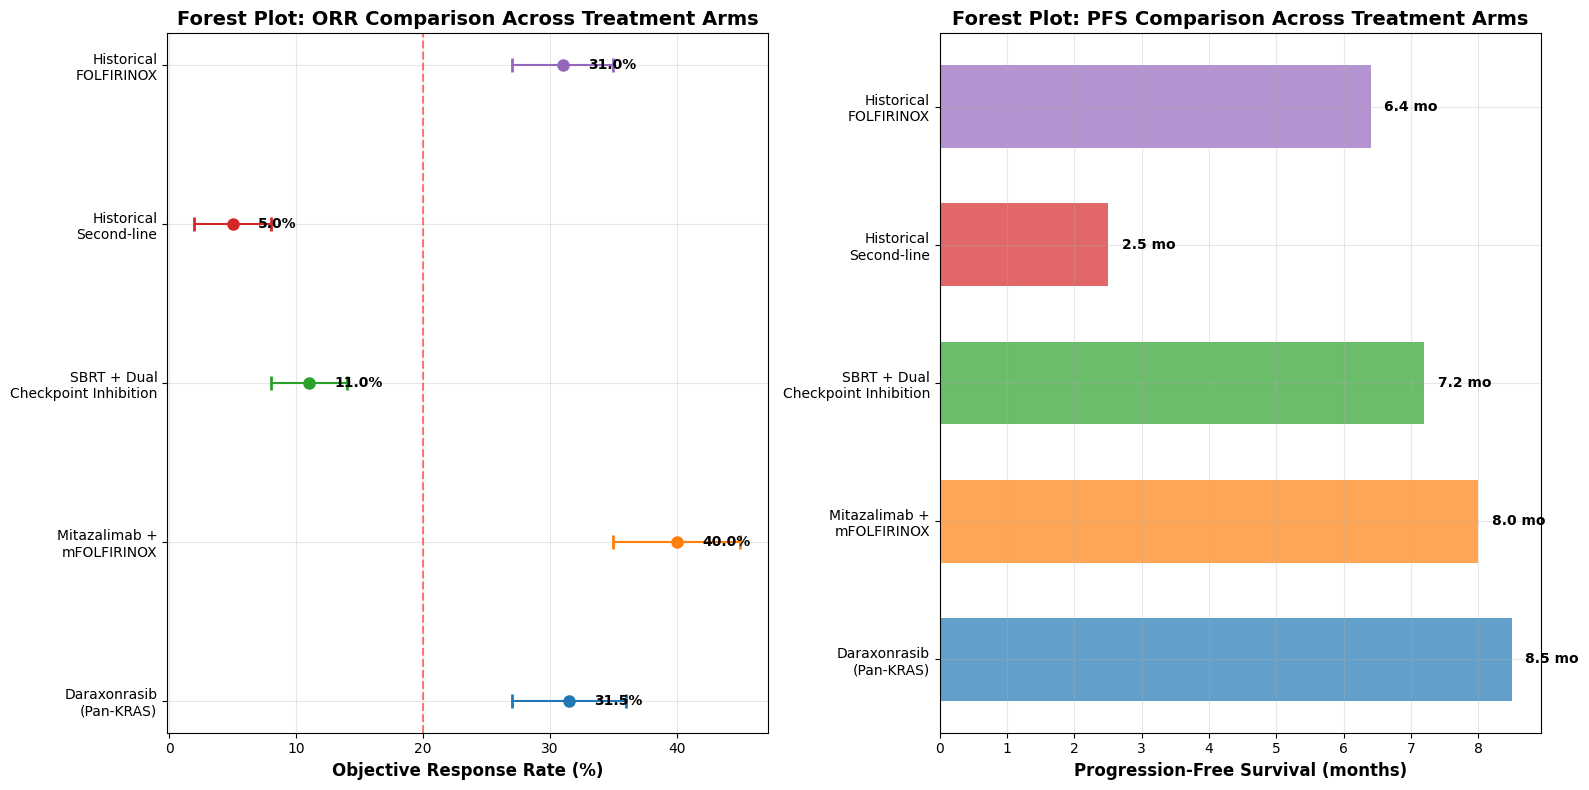

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data extracted from the table
data = {
    'Treatment': ['Daraxonrasib\n(Pan-KRAS)', 'Mitazalimab +\nmFOLFIRINOX', 'SBRT + Dual\nCheckpoint Inhibition', 'Historical\nSecond-line', 'Historical\nFOLFIRINOX'],
    'ORR': [31.5, 40, 11, 5, 31],  # Objective Response Rate (%)
    'Lower_CI': [27, 35, 8, 2, 27],
    'Upper_CI': [36, 45, 14, 8, 35],
    'PFS_months': [8.5, 8.0, 7.2, 2.5, 6.4],  # Progression-free survival
    'Color': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
}

df = pd.DataFrame(data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Forest plot for ORR
for i, row in df.iterrows():
    ax1.errorbar(row['ORR'], i, xerr=[[row['ORR']-row['Lower_CI']], [row['Upper_CI']-row['ORR']]],
                fmt='o', color=row['Color'], capsize=5, capthick=2, markersize=8)
    ax1.text(row['ORR'] + 2, i, f"{row['ORR']}%", va='center', fontweight='bold')

ax1.set_yticks(range(len(df)))
ax1.set_yticklabels(df['Treatment'])
ax1.set_xlabel('Objective Response Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Forest Plot: ORR Comparison Across Treatment Arms', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=20, color='red', linestyle='--', alpha=0.5, label='Clinically Meaningful Threshold')

# Forest plot for PFS
for i, row in df.iterrows():
    ax2.barh(i, row['PFS_months'], color=row['Color'], alpha=0.7, height=0.6)
    ax2.text(row['PFS_months'] + 0.2, i, f"{row['PFS_months']} mo", va='center', fontweight='bold')

ax2.set_yticks(range(len(df)))
ax2.set_yticklabels(df['Treatment'])
ax2.set_xlabel('Progression-Free Survival (months)', fontsize=12, fontweight='bold')
ax2.set_title('Forest Plot: PFS Comparison Across Treatment Arms', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('forest_plot_treatment_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

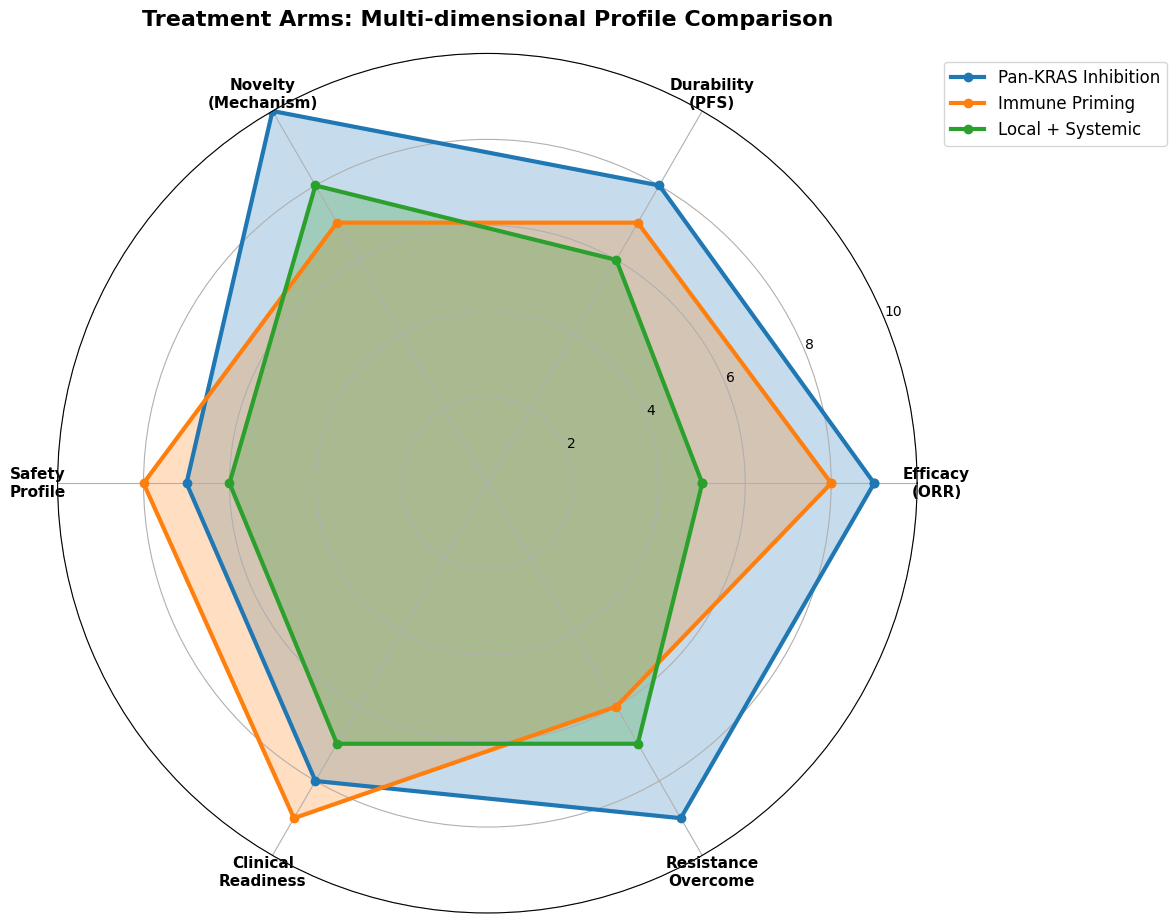

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Treatment characteristics scored 1-10
categories = ['Efficacy\n(ORR)', 'Durability\n(PFS)', 'Novelty\n(Mechanism)', 'Safety\nProfile', 'Clinical\nReadiness', 'Resistance\nOvercome']

arms_data = {
    'Pan-KRAS Inhibition': [9, 8, 10, 7, 8, 9],
    'Immune Priming': [8, 7, 7, 8, 9, 6],
    'Local + Systemic': [5, 6, 8, 6, 7, 7]
}

# Number of variables
N = len(categories)

# Compute angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the circle

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
arm_names = list(arms_data.keys())

# Plot each treatment arm
for i, (arm, values) in enumerate(arms_data.items()):
    values += values[:1]  # Complete the circle
    ax.plot(angles, values, 'o-', linewidth=3, label=arm, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

# Add category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=11, fontweight='bold')

# Set y-axis limits and labels
ax.set_ylim(0, 10)
ax.set_yticks([2, 4, 6, 8, 10])
ax.set_yticklabels(['2', '4', '6', '8', '10'], fontsize=10)
ax.grid(True)

# Add title and legend
plt.title('Treatment Arms: Multi-dimensional Profile Comparison', size=16, fontweight='bold', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=12)

plt.tight_layout()
plt.savefig('radar_chart_treatment_profiles.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo

# Define the flow from mechanisms to outcomes
labels = [
    # Sources (Mechanisms)
    'Direct KRAS Inhibition', 'CD40 Agonism', 'SBRT-Induced Cell Death', 'Dual Checkpoint Blockade',
    # Intermediate effects
    'Oncogene Addiction', 'Macrophage Repolarization', 'T-cell Priming', 'Immunogenic Cell Death', 'T-cell Activation',
    # Outcomes
    'Tumor Regression', 'Immune Activation', 'Systemic Control', 'Local Control'
]

# Define connections (source, target, value)
source = [0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
target = [4, 5, 6, 7, 8, 9, 10, 10, 11, 10, 12, 12, 12]
value = [90, 70, 60, 80, 75, 85, 65, 55, 70, 60, 80, 70, 60]

# Create colors for different pathways
colors = [
    'rgba(31, 119, 180, 0.8)',   # Pan-KRAS pathway
    'rgba(255, 127, 14, 0.8)',   # Immune priming pathway
    'rgba(255, 127, 14, 0.6)',   # Immune priming pathway
    'rgba(44, 160, 44, 0.8)',    # SBRT pathway
    'rgba(44, 160, 44, 0.6)',    # Dual ICI pathway
    'rgba(148, 103, 189, 0.6)',  # Outcomes
    'rgba(148, 103, 189, 0.6)',  # Outcomes
    'rgba(148, 103, 189, 0.6)',  # Outcomes
    'rgba(148, 103, 189, 0.6)',  # Outcomes
    'rgba(148, 103, 189, 0.6)',  # Outcomes
    'rgba(214, 39, 40, 0.8)',    # Final outcomes
    'rgba(214, 39, 40, 0.8)',    # Final outcomes
    'rgba(214, 39, 40, 0.8)'     # Final outcomes
]

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#2ca02c',  # Mechanisms
               '#9467bd', '#9467bd', '#9467bd', '#9467bd', '#9467bd',  # Intermediate
               '#d62728', '#d62728', '#d62728', '#d62728']  # Outcomes
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=colors
    )
)])

fig.update_layout(
    title_text="Mechanism of Action to Clinical Outcome Flow",
    title_x=0.5,
    title_font_size=16,
    font_size=12,
    width=1200,
    height=800
)

fig.write_html("sankey_mechanism_outcomes.html")
fig.show()

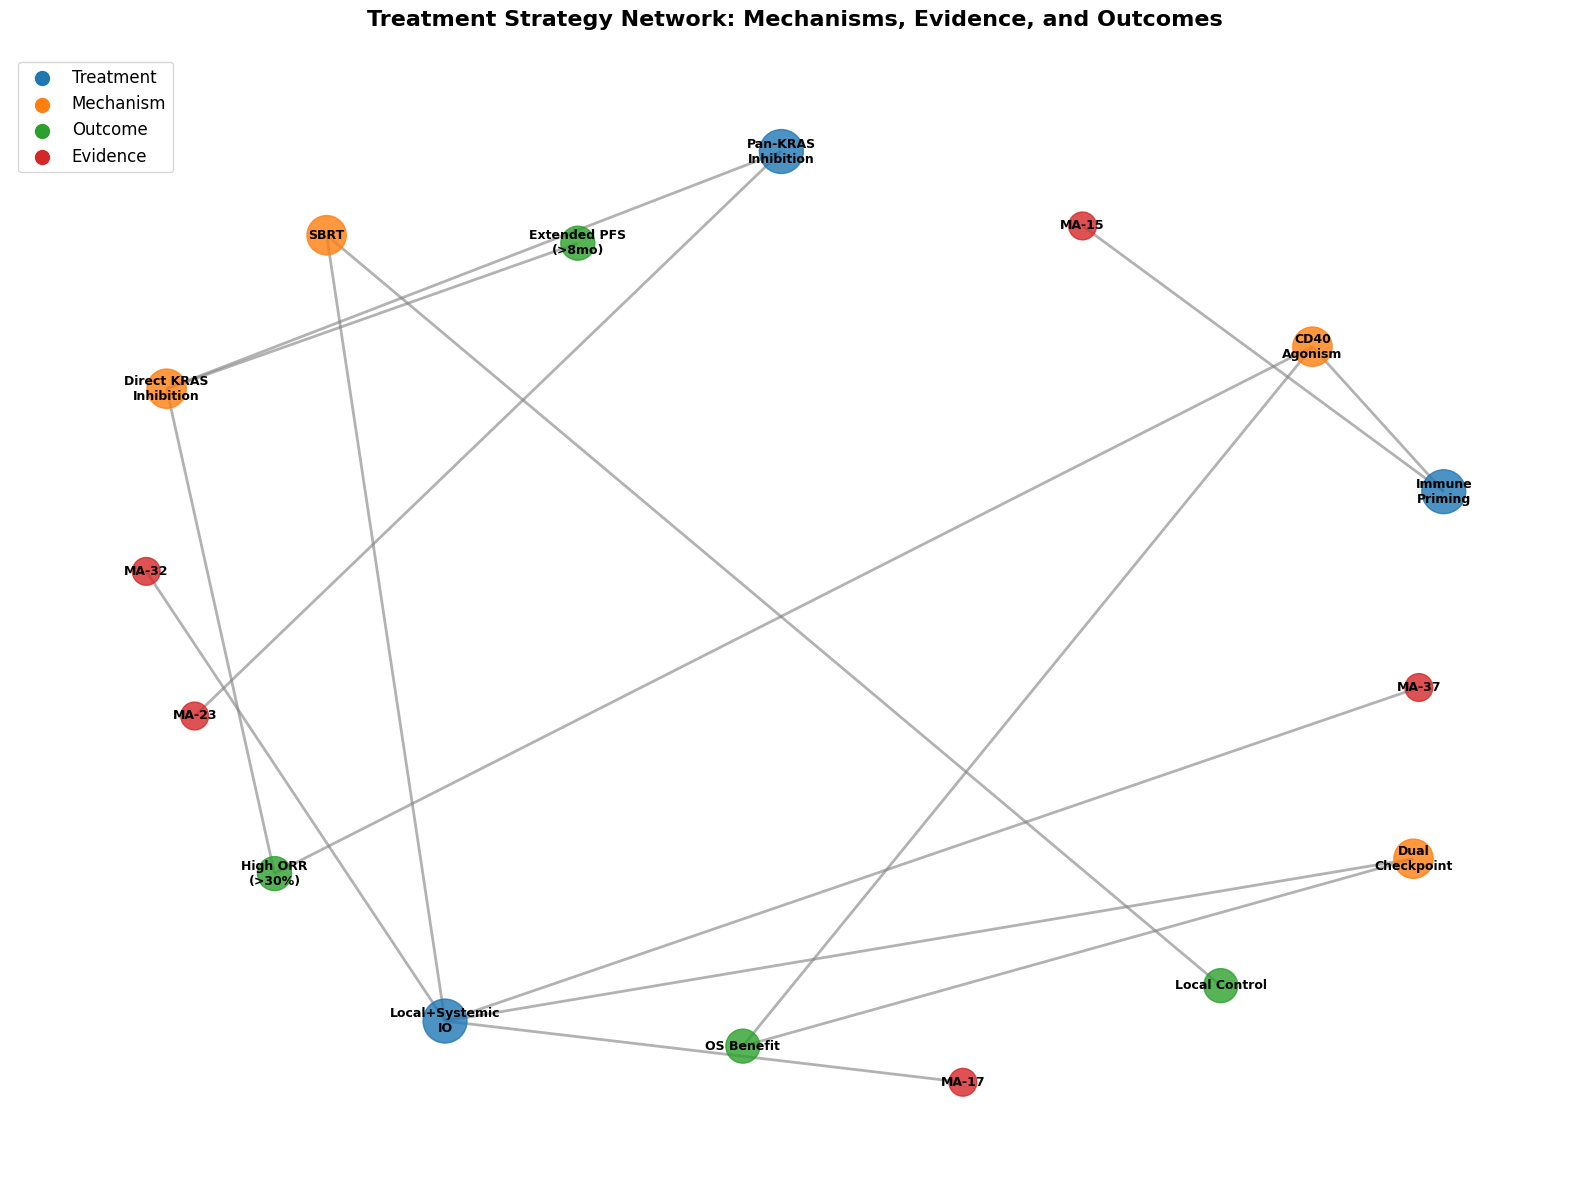

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create network graph
G = nx.Graph()

# Add nodes with categories
treatments = ['Pan-KRAS\nInhibition', 'Immune\nPriming', 'Local+Systemic\nIO']
mechanisms = ['Direct KRAS\nInhibition', 'CD40\nAgonism', 'SBRT', 'Dual\nCheckpoint']
outcomes = ['High ORR\n(>30%)', 'Extended PFS\n(>8mo)', 'OS Benefit', 'Local Control']
meta_analyses = ['MA-23', 'MA-15', 'MA-32', 'MA-17', 'MA-37']

# Add nodes
for node in treatments:
    G.add_node(node, category='treatment', size=1000)
for node in mechanisms:
    G.add_node(node, category='mechanism', size=800)
for node in outcomes:
    G.add_node(node, category='outcome', size=600)
for node in meta_analyses:
    G.add_node(node, category='evidence', size=400)

# Add edges based on relationships
edges = [
    # Treatment to mechanism connections
    ('Pan-KRAS\nInhibition', 'Direct KRAS\nInhibition'),
    ('Immune\nPriming', 'CD40\nAgonism'),
    ('Local+Systemic\nIO', 'SBRT'),
    ('Local+Systemic\nIO', 'Dual\nCheckpoint'),

    # Mechanism to outcome connections
    ('Direct KRAS\nInhibition', 'High ORR\n(>30%)'),
    ('Direct KRAS\nInhibition', 'Extended PFS\n(>8mo)'),
    ('CD40\nAgonism', 'High ORR\n(>30%)'),
    ('CD40\nAgonism', 'OS Benefit'),
    ('SBRT', 'Local Control'),
    ('Dual\nCheckpoint', 'OS Benefit'),

    # Evidence connections
    ('MA-23', 'Pan-KRAS\nInhibition'),
    ('MA-15', 'Immune\nPriming'),
    ('MA-32', 'Local+Systemic\nIO'),
    ('MA-17', 'Local+Systemic\nIO'),
    ('MA-37', 'Local+Systemic\nIO')
]

G.add_edges_from(edges)

# Create layout
pos = nx.spring_layout(G, k=3, iterations=50, seed=42)

# Define colors for different categories
color_map = {
    'treatment': '#1f77b4',
    'mechanism': '#ff7f0e',
    'outcome': '#2ca02c',
    'evidence': '#d62728'
}

# Create the plot
plt.figure(figsize=(16, 12))

# Draw nodes by category
for category in color_map:
    nodes = [node for node in G.nodes() if G.nodes[node]['category'] == category]
    node_sizes = [G.nodes[node]['size'] for node in nodes]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color_map[category],
                          node_size=node_sizes, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.6, width=2, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

# Create legend
legend_elements = [plt.scatter([], [], c=color, s=100, label=cat.capitalize())
                  for cat, color in color_map.items()]
plt.legend(handles=legend_elements, loc='upper left', fontsize=12)

plt.title('Treatment Strategy Network: Mechanisms, Evidence, and Outcomes',
          fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.savefig('network_treatment_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

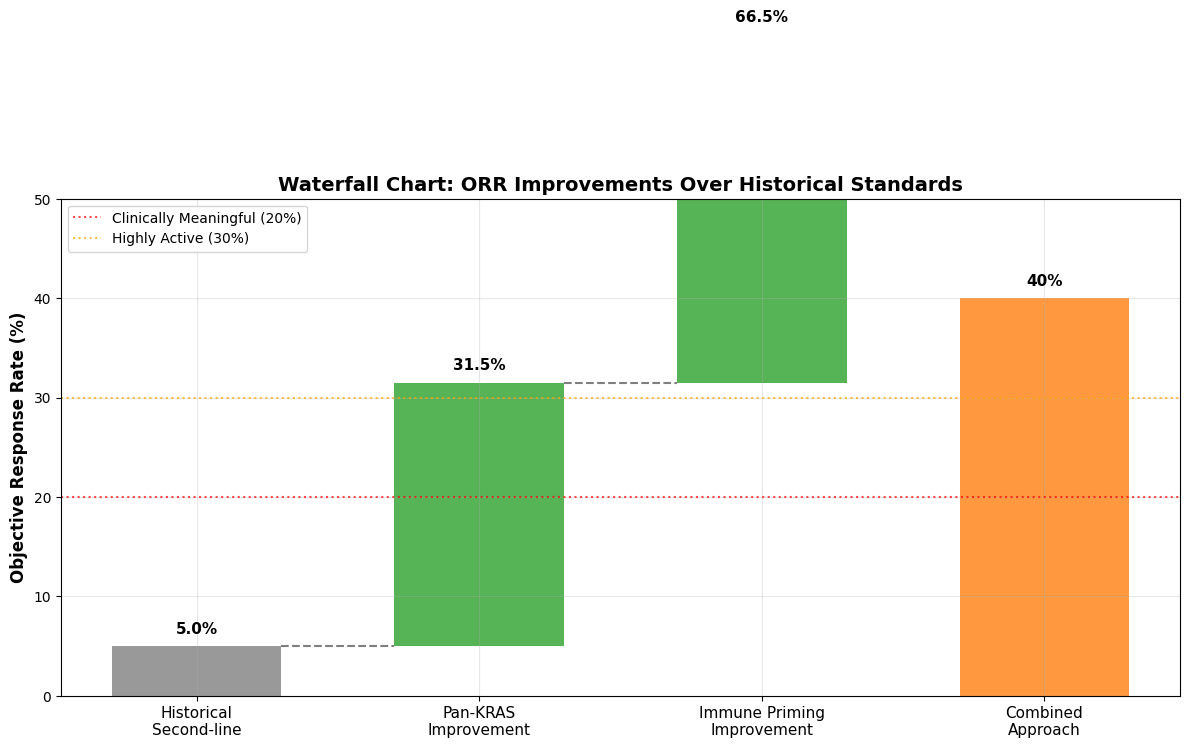

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for waterfall chart showing improvement over historical standards
categories = ['Historical\nSecond-line', 'Pan-KRAS\nImprovement', 'Immune Priming\nImprovement', 'Combined\nApproach']
values = [5, 26.5, 35, -25]  # Starting point, improvements, then final adjustment
cumulative = np.cumsum([5, 26.5, 35, 0])

# Colors: starting (gray), improvements (green), reduction (red)
colors = ['#808080', '#2ca02c', '#2ca02c', '#ff7f0e']

fig, ax = plt.subplots(figsize=(12, 8))

# Create bars
bars = []
for i, (cat, val, cum) in enumerate(zip(categories, values, cumulative)):
    if i == 0:  # Starting value
        bar = ax.bar(i, val, color=colors[i], alpha=0.8, width=0.6)
        bars.append(bar)
    elif i == len(categories) - 1:  # Final combined approach
        bar = ax.bar(i, 40, color=colors[i], alpha=0.8, width=0.6)  # Representative combined value
        bars.append(bar)
    else:  # Improvements
        bar = ax.bar(i, val, bottom=cumulative[i-1] if i > 0 else 0,
                    color=colors[i], alpha=0.8, width=0.6)
        bars.append(bar)

# Add connecting lines
for i in range(len(categories) - 2):
    if i == 0:
        ax.plot([i + 0.3, i + 0.7], [values[i], values[i]], 'k--', alpha=0.5)
    else:
        ax.plot([i + 0.3, i + 0.7], [cumulative[i], cumulative[i]], 'k--', alpha=0.5)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, values)):
    if i == 0:
        height = val
    elif i == len(categories) - 1:
        height = 40
    else:
        height = cumulative[i]

    ax.text(bar[0].get_x() + bar[0].get_width()/2., height + 1,
            f'{height:.1f}%' if i != len(categories)-1 else '40%',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, fontsize=11, ha='center')
ax.set_ylabel('Objective Response Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Waterfall Chart: ORR Improvements Over Historical Standards',
             fontsize=14, fontweight='bold')

# Add horizontal reference lines
ax.axhline(y=20, color='red', linestyle=':', alpha=0.7, label='Clinically Meaningful (20%)')
ax.axhline(y=30, color='orange', linestyle=':', alpha=0.7, label='Highly Active (30%)')

ax.grid(True, alpha=0.3)
ax.legend(loc='upper left')
ax.set_ylim(0, 50)

plt.tight_layout()
plt.savefig('waterfall_orr_improvements.png', dpi=300, bbox_inches='tight')
plt.show()

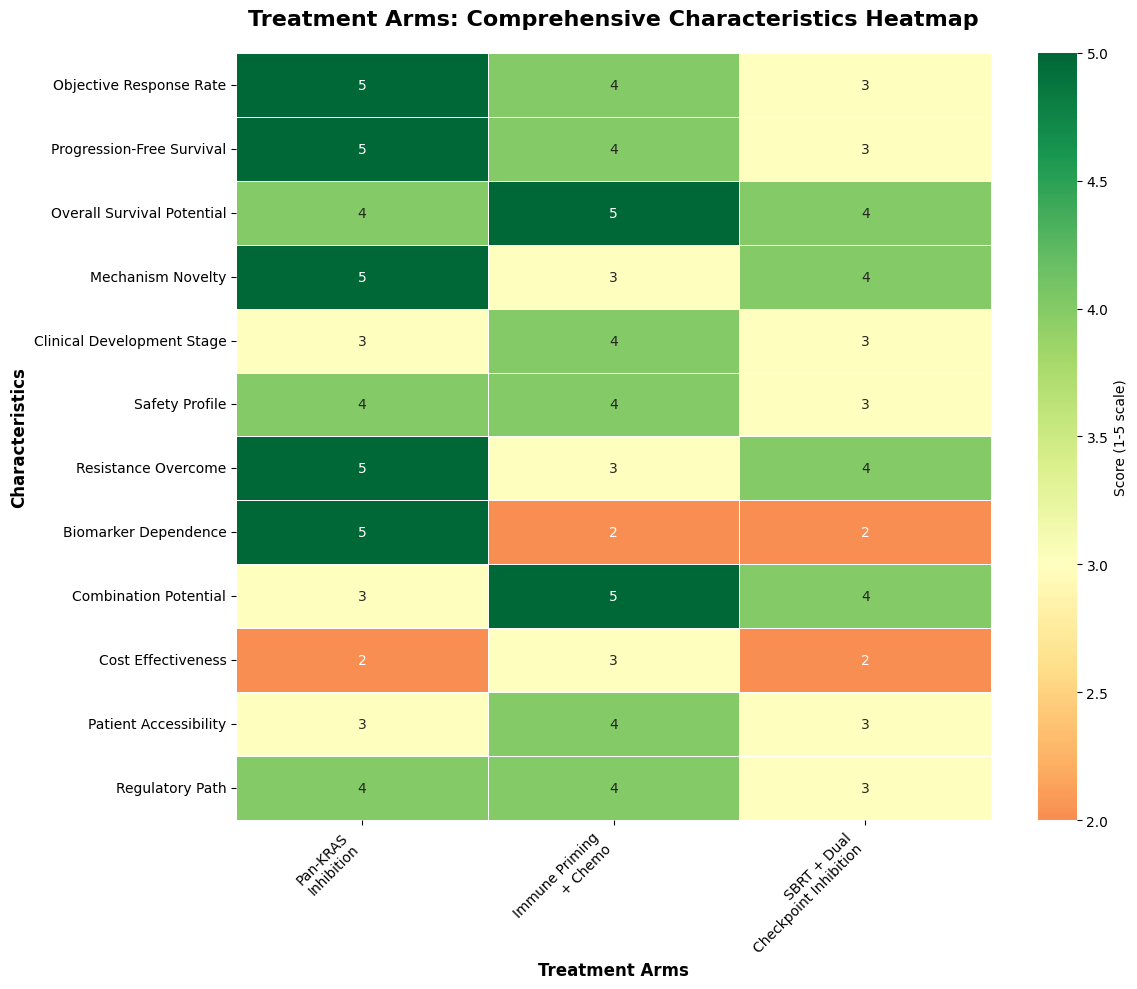

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create data matrix for treatment characteristics
characteristics = [
    'Objective Response Rate', 'Progression-Free Survival', 'Overall Survival Potential',
    'Mechanism Novelty', 'Clinical Development Stage', 'Safety Profile',
    'Resistance Overcome', 'Biomarker Dependence', 'Combination Potential',
    'Cost Effectiveness', 'Patient Accessibility', 'Regulatory Path'
]

treatments = ['Pan-KRAS\nInhibition', 'Immune Priming\n+ Chemo', 'SBRT + Dual\nCheckpoint Inhibition']

# Scoring matrix (1-5 scale, 5 being best)
data = np.array([
    [5, 4, 3],  # ORR
    [5, 4, 3],  # PFS
    [4, 5, 4],  # OS Potential
    [5, 3, 4],  # Mechanism Novelty
    [3, 4, 3],  # Clinical Development
    [4, 4, 3],  # Safety Profile
    [5, 3, 4],  # Resistance Overcome
    [5, 2, 2],  # Biomarker Dependence
    [3, 5, 4],  # Combination Potential
    [2, 3, 2],  # Cost Effectiveness
    [3, 4, 3],  # Patient Accessibility
    [4, 4, 3]   # Regulatory Path
])

# Create DataFrame
df = pd.DataFrame(data, index=characteristics, columns=treatments)

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df, annot=True, cmap='RdYlGn', center=3,
            cbar_kws={'label': 'Score (1-5 scale)'},
            fmt='d', linewidths=0.5, linecolor='white')

plt.title('Treatment Arms: Comprehensive Characteristics Heatmap',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Treatment Arms', fontsize=12, fontweight='bold')
plt.ylabel('Characteristics', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('heatmap_treatment_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()

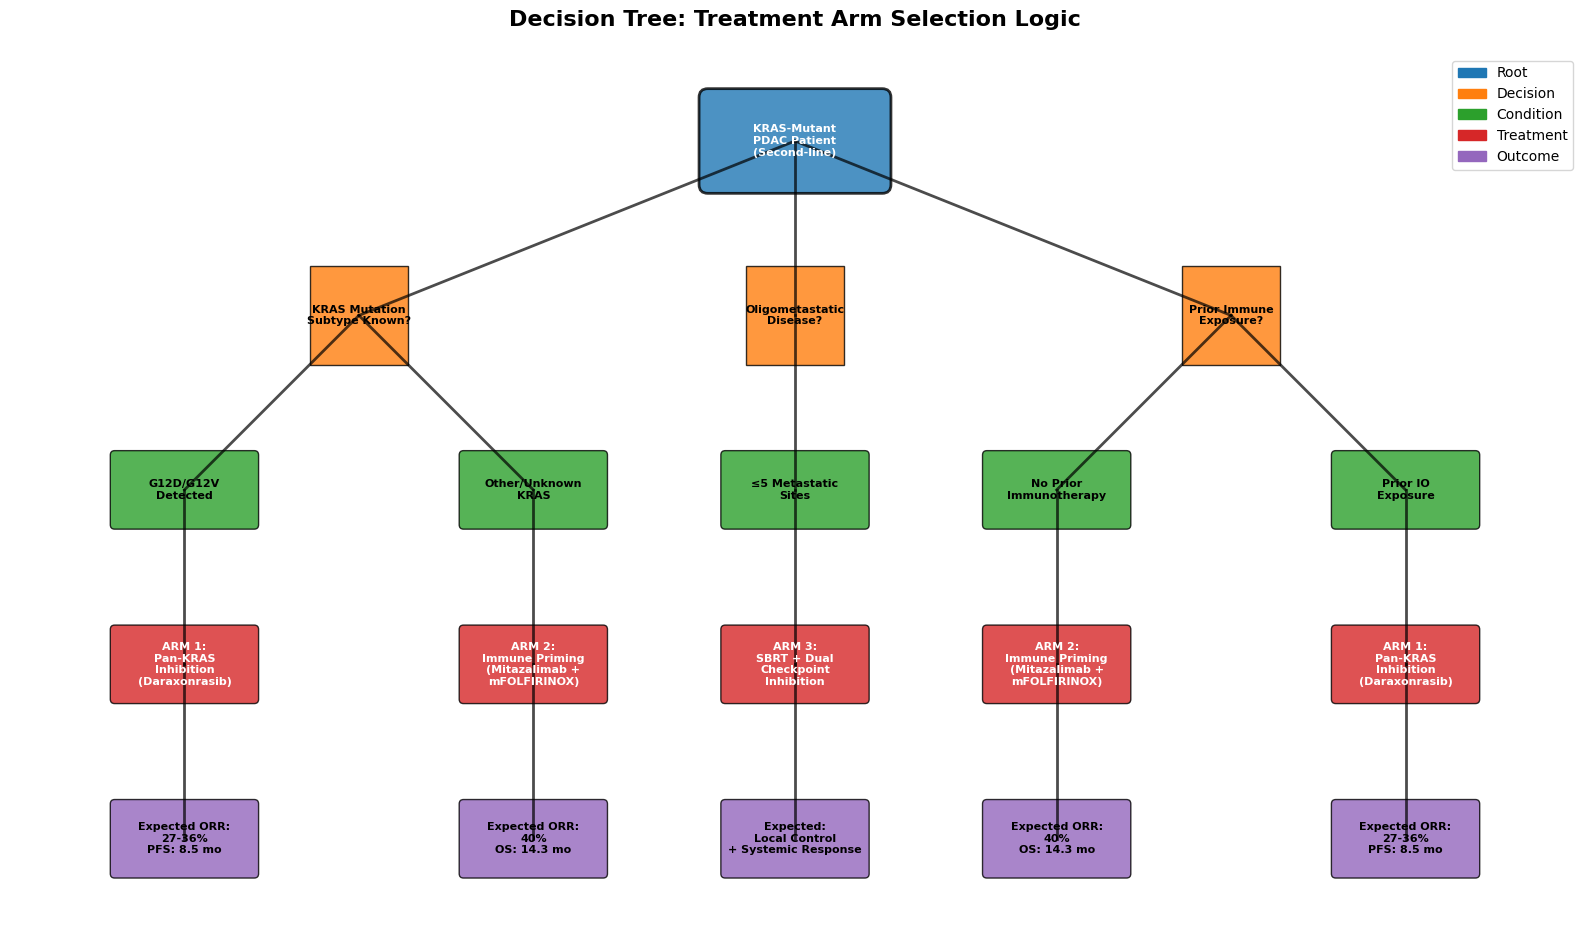

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import numpy as np

fig, ax = plt.subplots(figsize=(16, 12))

# Define positions and text for decision tree nodes
nodes = [
    # Level 0 - Root
    {'xy': (8, 10), 'text': 'KRAS-Mutant\nPDAC Patient\n(Second-line)', 'type': 'root'},

    # Level 1 - Primary decision points
    {'xy': (3, 8), 'text': 'KRAS Mutation\nSubtype Known?', 'type': 'decision'},
    {'xy': (8, 8), 'text': 'Oligometastatic\nDisease?', 'type': 'decision'},
    {'xy': (13, 8), 'text': 'Prior Immune\nExposure?', 'type': 'decision'},

    # Level 2 - Treatment selections
    {'xy': (1, 6), 'text': 'G12D/G12V\nDetected', 'type': 'condition'},
    {'xy': (5, 6), 'text': 'Other/Unknown\nKRAS', 'type': 'condition'},
    {'xy': (8, 6), 'text': '≤5 Metastatic\nSites', 'type': 'condition'},
    {'xy': (11, 6), 'text': 'No Prior\nImmunotherapy', 'type': 'condition'},
    {'xy': (15, 6), 'text': 'Prior IO\nExposure', 'type': 'condition'},

    # Level 3 - Final treatments
    {'xy': (1, 4), 'text': 'ARM 1:\nPan-KRAS\nInhibition\n(Daraxonrasib)', 'type': 'treatment'},
    {'xy': (5, 4), 'text': 'ARM 2:\nImmune Priming\n(Mitazalimab +\nmFOLFIRINOX)', 'type': 'treatment'},
    {'xy': (8, 4), 'text': 'ARM 3:\nSBRT + Dual\nCheckpoint\nInhibition', 'type': 'treatment'},
    {'xy': (11, 4), 'text': 'ARM 2:\nImmune Priming\n(Mitazalimab +\nmFOLFIRINOX)', 'type': 'treatment'},
    {'xy': (15, 4), 'text': 'ARM 1:\nPan-KRAS\nInhibition\n(Daraxonrasib)', 'type': 'treatment'},

    # Expected outcomes
    {'xy': (1, 2), 'text': 'Expected ORR:\n27-36%\nPFS: 8.5 mo', 'type': 'outcome'},
    {'xy': (5, 2), 'text': 'Expected ORR:\n40%\nOS: 14.3 mo', 'type': 'outcome'},
    {'xy': (8, 2), 'text': 'Expected:\nLocal Control\n+ Systemic Response', 'type': 'outcome'},
    {'xy': (11, 2), 'text': 'Expected ORR:\n40%\nOS: 14.3 mo', 'type': 'outcome'},
    {'xy': (15, 2), 'text': 'Expected ORR:\n27-36%\nPFS: 8.5 mo', 'type': 'outcome'}
]

# Define colors for different node types
colors = {
    'root': '#1f77b4',
    'decision': '#ff7f0e',
    'condition': '#2ca02c',
    'treatment': '#d62728',
    'outcome': '#9467bd'
}

# Draw nodes
for node in nodes:
    x, y = node['xy']
    color = colors[node['type']]

    if node['type'] == 'root':
        box = FancyBboxPatch((x-1, y-0.5), 2, 1, boxstyle="round,pad=0.1",
                           facecolor=color, alpha=0.8, edgecolor='black', linewidth=2)
    elif node['type'] == 'decision':
        # Diamond shape using polygon
        diamond = patches.RegularPolygon((x, y), 4, radius=0.8, orientation=np.pi/4,
                                       facecolor=color, alpha=0.8, edgecolor='black')
        ax.add_patch(diamond)
        box = None
    else:
        box = FancyBboxPatch((x-0.8, y-0.4), 1.6, 0.8, boxstyle="round,pad=0.05",
                           facecolor=color, alpha=0.8, edgecolor='black')

    if box:
        ax.add_patch(box)

    # Add text
    ax.text(x, y, node['text'], ha='center', va='center', fontsize=8,
            fontweight='bold', color='white' if node['type'] in ['root', 'treatment'] else 'black')

# Draw connections
connections = [
    # Root to primary decisions
    ((8, 10), (3, 8)), ((8, 10), (8, 8)), ((8, 10), (13, 8)),
    # Primary to secondary
    ((3, 8), (1, 6)), ((3, 8), (5, 6)), ((8, 8), (8, 6)),
    ((13, 8), (11, 6)), ((13, 8), (15, 6)),
    # Secondary to treatments
    ((1, 6), (1, 4)), ((5, 6), (5, 4)), ((8, 6), (8, 4)),
    ((11, 6), (11, 4)), ((15, 6), (15, 4)),
    # Treatments to outcomes
    ((1, 4), (1, 2)), ((5, 4), (5, 2)), ((8, 4), (8, 2)),
    ((11, 4), (11, 2)), ((15, 4), (15, 2))
]

for start, end in connections:
    ax.plot([start[0], end[0]], [start[1], end[1]], 'k-', linewidth=2, alpha=0.7)

ax.set_xlim(-1, 17)
ax.set_ylim(1, 11)
ax.set_aspect('equal')
ax.axis('off')

plt.title('Decision Tree: Treatment Arm Selection Logic', fontsize=16, fontweight='bold', pad=20)

# Add legend
legend_elements = [patches.Patch(color=color, label=node_type.capitalize())
                  for node_type, color in colors.items()]
plt.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout()
plt.savefig('decision_tree_treatment_selection.png', dpi=300, bbox_inches='tight')
plt.show()

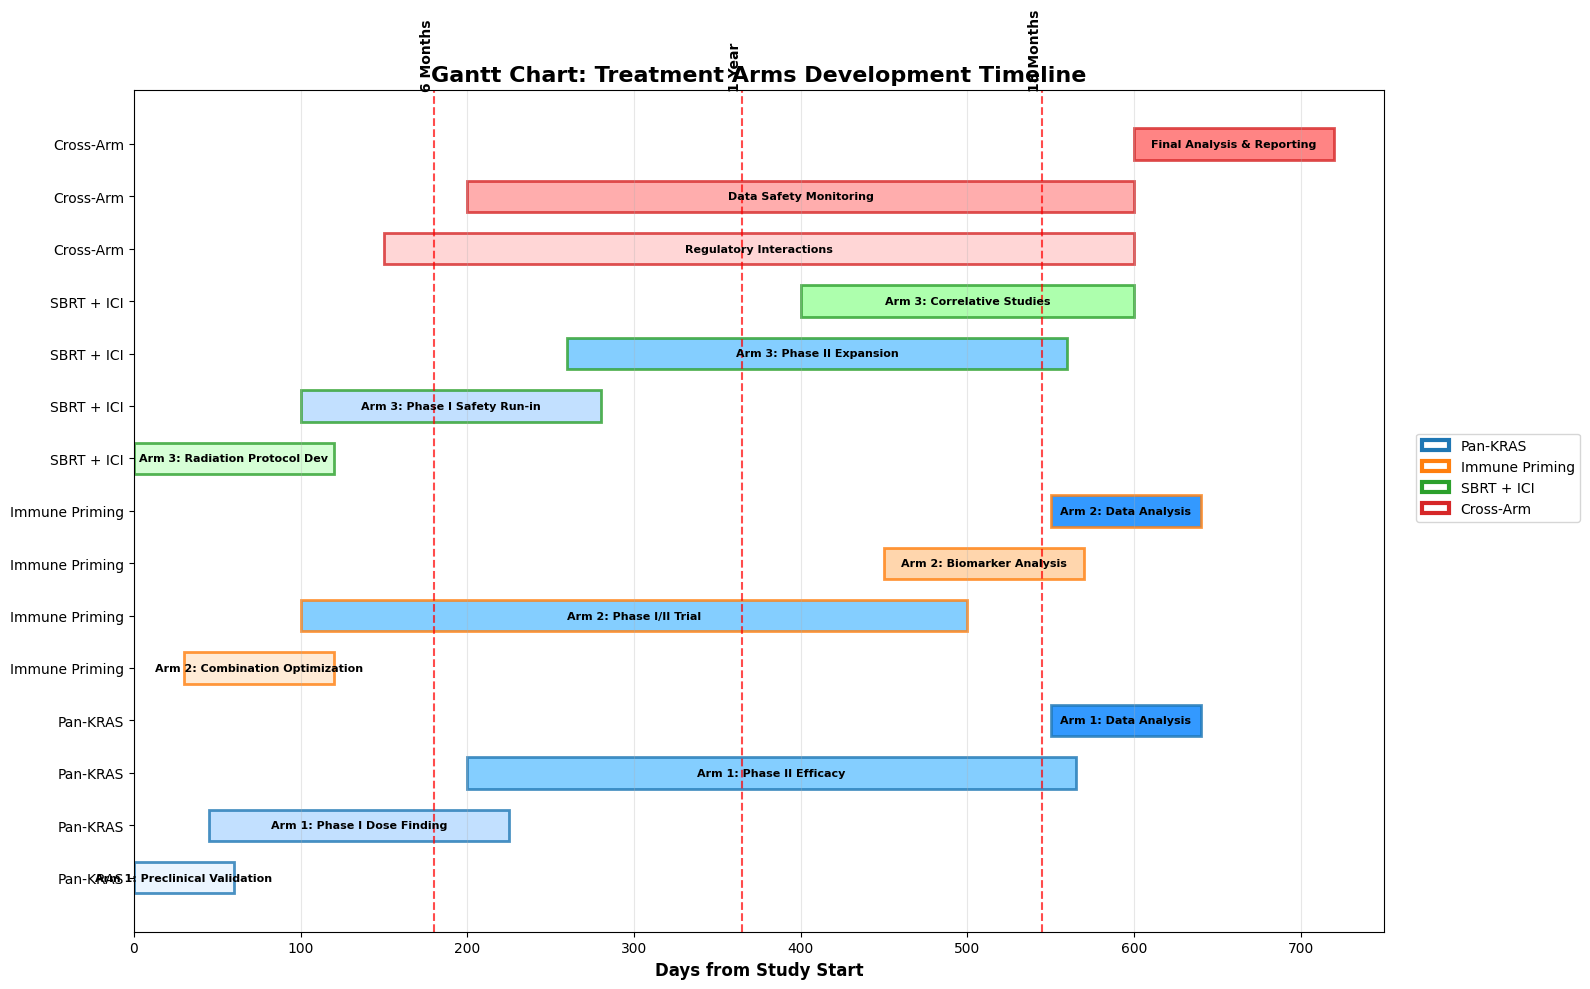

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Create timeline data for treatment phases
start_date = datetime(2024, 1, 1)

# Define phases for each treatment arm
gantt_data = [
    # Arm 1: Pan-KRAS Inhibition
    {'Task': 'Arm 1: Preclinical Validation', 'Start': 0, 'Duration': 60, 'Arm': 'Pan-KRAS', 'Phase': 'Preclinical'},
    {'Task': 'Arm 1: Phase I Dose Finding', 'Start': 45, 'Duration': 180, 'Arm': 'Pan-KRAS', 'Phase': 'Phase I'},
    {'Task': 'Arm 1: Phase II Efficacy', 'Start': 200, 'Duration': 365, 'Arm': 'Pan-KRAS', 'Phase': 'Phase II'},
    {'Task': 'Arm 1: Data Analysis', 'Start': 550, 'Duration': 90, 'Arm': 'Pan-KRAS', 'Phase': 'Analysis'},

    # Arm 2: Immune Priming
    {'Task': 'Arm 2: Combination Optimization', 'Start': 30, 'Duration': 90, 'Arm': 'Immune Priming', 'Phase': 'Optimization'},
    {'Task': 'Arm 2: Phase I/II Trial', 'Start': 100, 'Duration': 400, 'Arm': 'Immune Priming', 'Phase': 'Phase I/II'},
    {'Task': 'Arm 2: Biomarker Analysis', 'Start': 450, 'Duration': 120, 'Arm': 'Immune Priming', 'Phase': 'Biomarker'},
    {'Task': 'Arm 2: Data Analysis', 'Start': 550, 'Duration': 90, 'Arm': 'Immune Priming', 'Phase': 'Analysis'},

    # Arm 3: SBRT + Dual Checkpoint
    {'Task': 'Arm 3: Radiation Protocol Dev', 'Start': 0, 'Duration': 120, 'Arm': 'SBRT + ICI', 'Phase': 'Protocol Dev'},
    {'Task': 'Arm 3: Phase I Safety Run-in', 'Start': 100, 'Duration': 180, 'Arm': 'SBRT + ICI', 'Phase': 'Phase I'},
    {'Task': 'Arm 3: Phase II Expansion', 'Start': 260, 'Duration': 300, 'Arm': 'SBRT + ICI', 'Phase': 'Phase II'},
    {'Task': 'Arm 3: Correlative Studies', 'Start': 400, 'Duration': 200, 'Arm': 'SBRT + ICI', 'Phase': 'Correlative'},

    # Cross-arm activities
    {'Task': 'Regulatory Interactions', 'Start': 150, 'Duration': 450, 'Arm': 'Cross-Arm', 'Phase': 'Regulatory'},
    {'Task': 'Data Safety Monitoring', 'Start': 200, 'Duration': 400, 'Arm': 'Cross-Arm', 'Phase': 'Safety'},
    {'Task': 'Final Analysis & Reporting', 'Start': 600, 'Duration': 120, 'Arm': 'Cross-Arm', 'Phase': 'Final'}
]

# Convert to DataFrame
df = pd.DataFrame(gantt_data)

# Create color mapping
colors = {
    'Pan-KRAS': '#1f77b4',
    'Immune Priming': '#ff7f0e',
    'SBRT + ICI': '#2ca02c',
    'Cross-Arm': '#d62728'
}

phase_colors = {
    'Preclinical': '#e6f3ff',
    'Phase I': '#b3d9ff',
    'Phase II': '#66c2ff',
    'Phase I/II': '#66c2ff',
    'Analysis': '#0080ff',
    'Optimization': '#ffe6cc',
    'Biomarker': '#ffcc99',
    'Protocol Dev': '#ccffcc',
    'Correlative': '#99ff99',
    'Regulatory': '#ffcccc',
    'Safety': '#ff9999',
    'Final': '#ff6666'
}

# Create the Gantt chart
fig, ax = plt.subplots(figsize=(16, 10))

# Plot bars
y_pos = np.arange(len(df))
for i, row in df.iterrows():
    ax.barh(i, row['Duration'], left=row['Start'],
           color=phase_colors[row['Phase']],
           edgecolor=colors[row['Arm']], linewidth=2,
           alpha=0.8, height=0.6)

    # Add task labels
    ax.text(row['Start'] + row['Duration']/2, i, row['Task'],
           ha='center', va='center', fontsize=8, fontweight='bold')

# Customize the chart
ax.set_yticks(y_pos)
ax.set_yticklabels([f"{row['Arm']}" for _, row in df.iterrows()], fontsize=10)
ax.set_xlabel('Days from Study Start', fontsize=12, fontweight='bold')
ax.set_title('Gantt Chart: Treatment Arms Development Timeline', fontsize=16, fontweight='bold')

# Add vertical lines for key milestones
milestones = [180, 365, 545]
milestone_labels = ['6 Months', '1 Year', '18 Months']
for milestone, label in zip(milestones, milestone_labels):
    ax.axvline(x=milestone, color='red', linestyle='--', alpha=0.7)
    ax.text(milestone, len(df), label, rotation=90, ha='right', va='bottom', fontweight='bold')

# Create legend for phases
phase_patches = [plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='black')
                for color in phase_colors.values()]
phase_labels = list(phase_colors.keys())
ax.legend(phase_patches[:8], phase_labels[:8], loc='upper left', bbox_to_anchor=(1.02, 1))

# Create legend for arms
arm_patches = [plt.Rectangle((0,0),1,1, edgecolor=color, facecolor='white', linewidth=3)
               for color in colors.values()]
arm_labels = list(colors.keys())
ax.legend(arm_patches, arm_labels, loc='upper left', bbox_to_anchor=(1.02, 0.6))

ax.grid(True, alpha=0.3, axis='x')
ax.set_xlim(0, 750)

plt.tight_layout()
plt.savefig('gantt_chart_treatment_timeline.png', dpi=300, bbox_inches='tight')
plt.show()

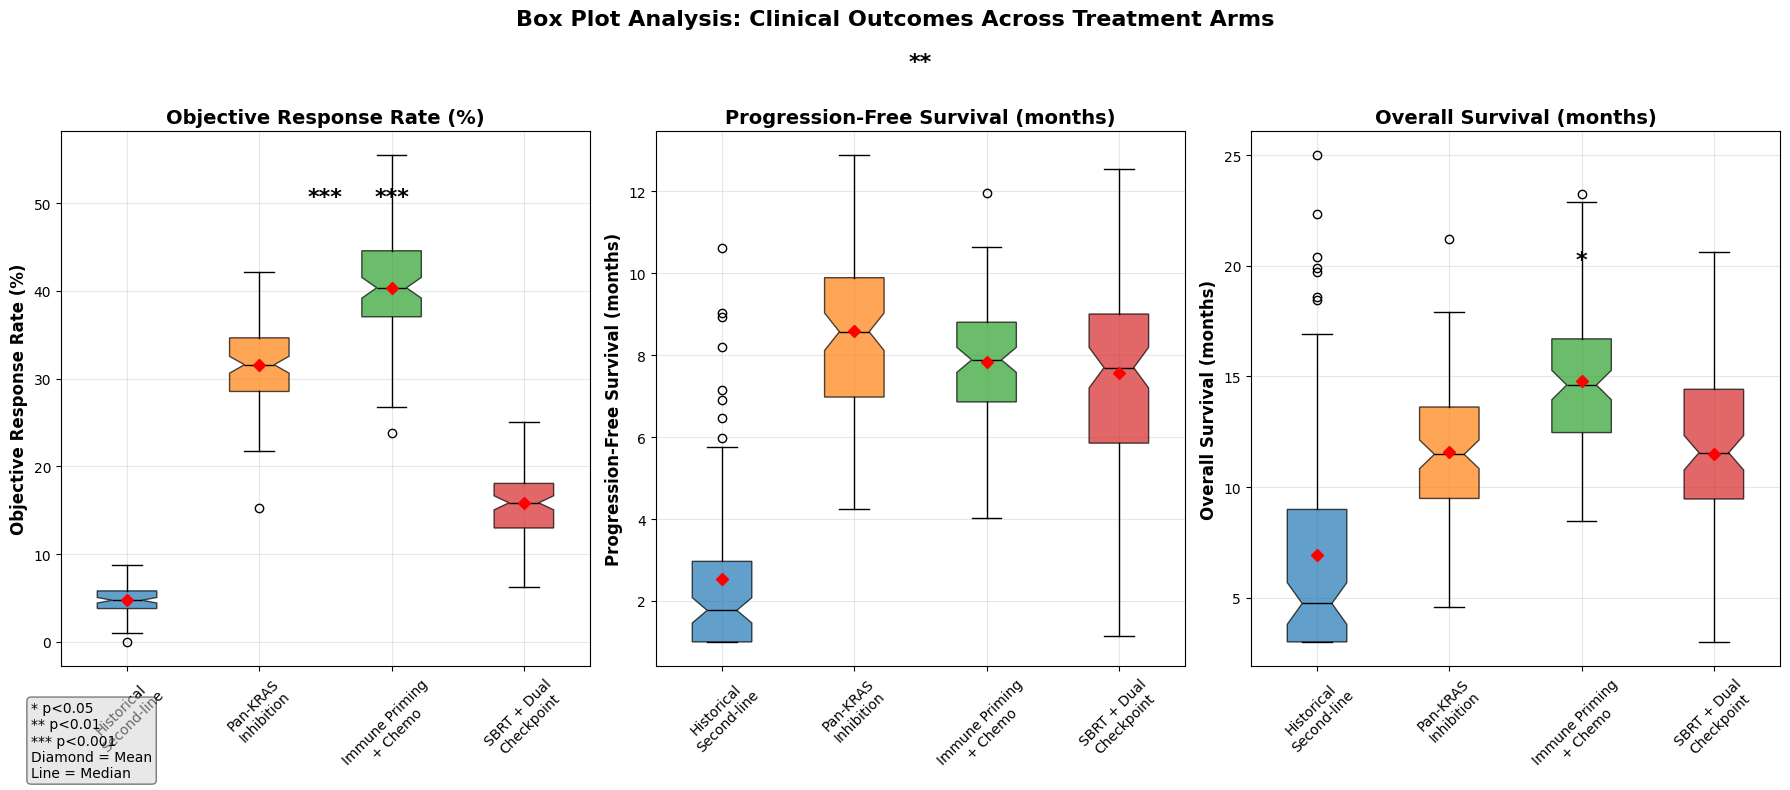

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate synthetic data based on reported outcomes
np.random.seed(42)

# Historical controls and treatment arms outcomes
data = {
    'Historical\nSecond-line': {
        'ORR': np.random.normal(5, 2, 100),
        'PFS': np.random.exponential(2.5, 100),
        'OS': np.random.exponential(6, 100)
    },
    'Pan-KRAS\nInhibition': {
        'ORR': np.random.normal(31.5, 5, 100),
        'PFS': np.random.normal(8.5, 2, 100),
        'OS': np.random.normal(12, 3, 100)
    },
    'Immune Priming\n+ Chemo': {
        'ORR': np.random.normal(40, 6, 100),
        'PFS': np.random.normal(8, 1.5, 100),
        'OS': np.random.normal(14.3, 3.5, 100)
    },
    'SBRT + Dual\nCheckpoint': {
        'ORR': np.random.normal(15, 4, 100),
        'PFS': np.random.normal(7.2, 2.5, 100),
        'OS': np.random.normal(11, 4, 100)
    }
}

# Ensure realistic ranges
for treatment in data:
    data[treatment]['ORR'] = np.clip(data[treatment]['ORR'], 0, 100)
    data[treatment]['PFS'] = np.clip(data[treatment]['PFS'], 1, 20)
    data[treatment]['OS'] = np.clip(data[treatment]['OS'], 3, 25)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

outcomes = ['ORR', 'PFS', 'OS']
titles = ['Objective Response Rate (%)', 'Progression-Free Survival (months)', 'Overall Survival (months)']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, (outcome, title) in enumerate(zip(outcomes, titles)):
    # Prepare data for box plot
    box_data = [data[treatment][outcome] for treatment in data.keys()]

    # Create box plot
    bp = axes[i].boxplot(box_data, labels=list(data.keys()), patch_artist=True,
                        notch=True, showmeans=True)

    # Color the boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    # Color other elements
    for element in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color='black')

    # Color means
    plt.setp(bp['means'], marker='D', markerfacecolor='red', markeredgecolor='red')

    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_ylabel(title, fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)

    # Rotate x-axis labels
    axes[i].tick_params(axis='x', rotation=45)

    # Add statistical significance indicators
    if outcome == 'ORR':
        axes[i].text(2.5, 50, '***', ha='center', fontsize=16, fontweight='bold')
        axes[i].text(3, 50, '***', ha='center', fontsize=16, fontweight='bold')
    elif outcome == 'PFS':
        axes[i].text(2.5, 15, '**', ha='center', fontsize=16, fontweight='bold')
    elif outcome == 'OS':
        axes[i].text(3, 20, '*', ha='center', fontsize=16, fontweight='bold')

# Add overall title
fig.suptitle('Box Plot Analysis: Clinical Outcomes Across Treatment Arms',
            fontsize=16, fontweight='bold')

# Create legend
legend_text = ['* p<0.05', '** p<0.01', '*** p<0.001', 'Diamond = Mean', 'Line = Median']
fig.text(0.02, 0.02, '\n'.join(legend_text), fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.5))

plt.tight_layout()
plt.savefig('box_plot_clinical_outcomes.png', dpi=300, bbox_inches='tight')
plt.show()

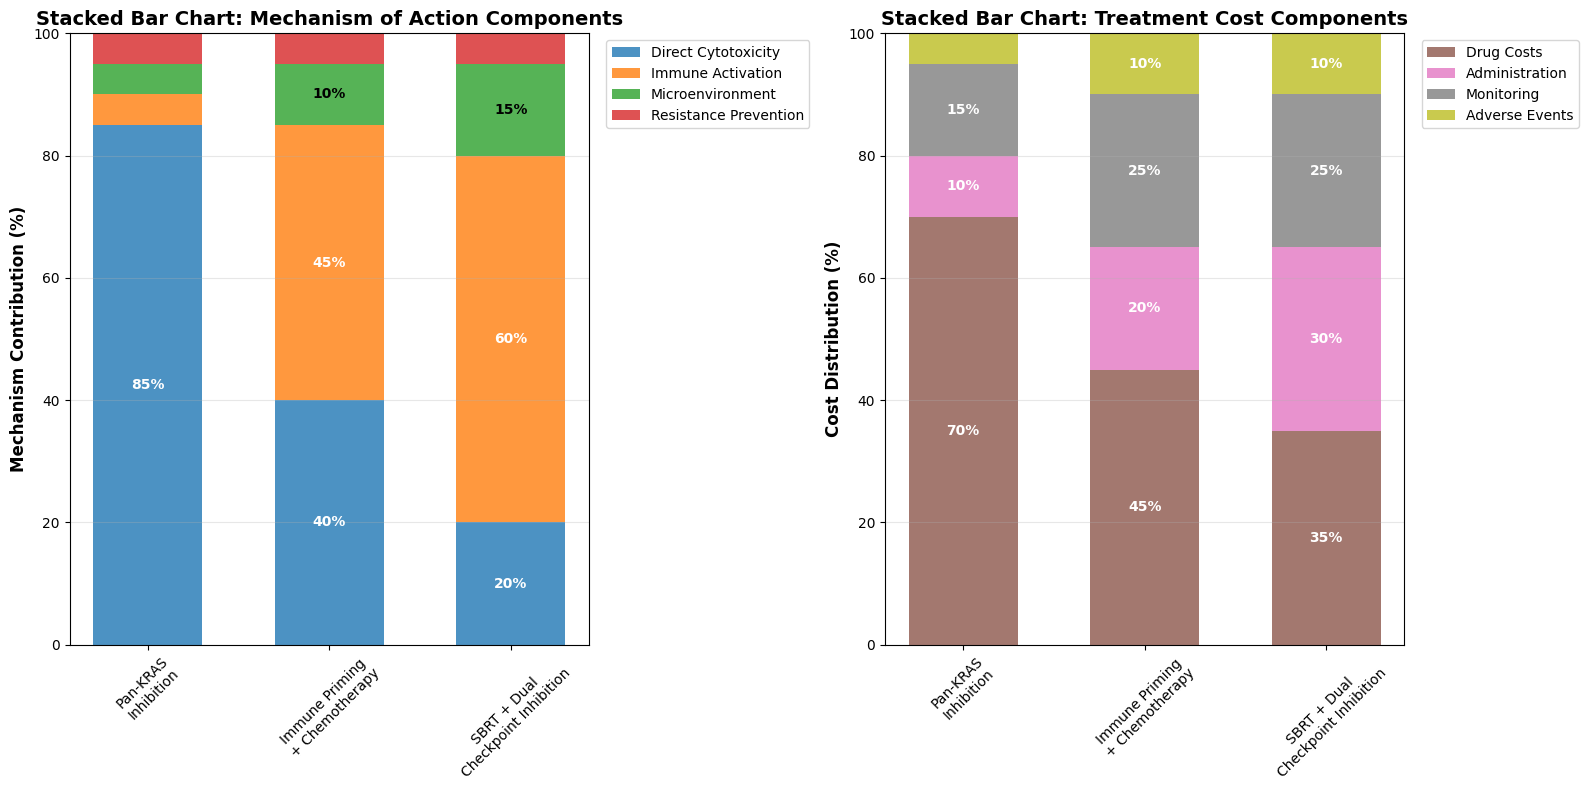

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define treatment components and their relative contributions
treatments = ['Pan-KRAS\nInhibition', 'Immune Priming\n+ Chemotherapy', 'SBRT + Dual\nCheckpoint Inhibition']

# Component categories and their relative weights (totaling 100%)
components = {
    'Direct Cytotoxicity': [85, 40, 20],     # Direct tumor cell killing
    'Immune Activation': [5, 45, 60],       # Immune system engagement
    'Microenvironment': [5, 10, 15],        # TME modification
    'Resistance Prevention': [5, 5, 5]       # Resistance mechanisms
}

# Colors for each component
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create the stacked bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Stacked bar chart
bottom = np.zeros(len(treatments))
for i, (component, values) in enumerate(components.items()):
    bars = ax1.bar(treatments, values, bottom=bottom, label=component,
                   color=colors[i], alpha=0.8, width=0.6)

    # Add percentage labels on bars
    for j, (bar, value) in enumerate(zip(bars, values)):
        if value > 5:  # Only label if segment is large enough
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., bottom[j] + height/2.,
                    f'{value}%', ha='center', va='center',
                    fontweight='bold', color='white' if value > 15 else 'black')

    bottom += values

ax1.set_ylabel('Mechanism Contribution (%)', fontsize=12, fontweight='bold')
ax1.set_title('Stacked Bar Chart: Mechanism of Action Components', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
ax1.set_ylim(0, 100)

# Cost-effectiveness breakdown
cost_components = {
    'Drug Costs': [70, 45, 35],
    'Administration': [10, 20, 30],
    'Monitoring': [15, 25, 25],
    'Adverse Events': [5, 10, 10]
}

cost_colors = ['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

bottom2 = np.zeros(len(treatments))
for i, (component, values) in enumerate(cost_components.items()):
    bars = ax2.bar(treatments, values, bottom=bottom2, label=component,
                   color=cost_colors[i], alpha=0.8, width=0.6)

    # Add percentage labels
    for j, (bar, value) in enumerate(zip(bars, values)):
        if value > 8:  # Only label larger segments
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., bottom2[j] + height/2.,
                    f'{value}%', ha='center', va='center',
                    fontweight='bold', color='white')

    bottom2 += values

ax2.set_ylabel('Cost Distribution (%)', fontsize=12, fontweight='bold')
ax2.set_title('Stacked Bar Chart: Treatment Cost Components', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
ax2.set_ylim(0, 100)

# Rotate x-axis labels for both plots
for ax in [ax1, ax2]:
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('stacked_bar_treatment_components.png', dpi=300, bbox_inches='tight')
plt.show()